In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('BreastCancer.csv')

In [3]:
df=data.copy()

In [4]:
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [5]:
df.shape

(699, 11)

In [6]:
df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [7]:
df['Bare.nuclei']=df['Bare.nuclei'].fillna(df['Bare.nuclei'].mean())

In [8]:
#df.isnull().sum()

In [9]:
X=df.drop(['Id','Class'],axis=1)
Y=df['Class']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=10,stratify=Y)


In [12]:
# hyperparameter tunning
# 1 grid search cv method --(better approach) all the combination, more computacional time
# 2 random search cv---there is random selection randomized aproach, less computational time


In [13]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn=KNeighborsClassifier()

In [16]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [17]:
# list of parameters that we handover to randomizedsearchcv or gridsearchcv


In [18]:
# create parameters wich is best 
n_neighbors=np.arange(3,50,step=2)
algorithm=['auto','ball_tree','kd_tree','brute']   
p=np.arange(1,2)

param_knn={"n_neighbors":n_neighbors,"algorithm":algorithm,"p":p}

In [19]:
param_knn

{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39, 41, 43, 45, 47, 49]),
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'p': array([1])}

In [20]:
# we using randomized search cv
random_cv=RandomizedSearchCV(knn,param_knn,cv=3,n_jobs=-1)# n_jobs=-1 takes computational time less


In [21]:
%%time
# Code for measuring execution time
 # magic time 

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 17.9 µs


In [22]:

random_cv.fit(X,Y)
print('the best parameter combination', random_cv.best_params_)

the best parameter combination {'p': 1, 'n_neighbors': 19, 'algorithm': 'brute'}


/Users/renaabbasova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/renaabbasova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

In [23]:
random_cv.best_score_

0.9570815450643777

In [24]:
random_cv.score(X_test,Y_test)

0.9642857142857143

In [25]:
random_cv.score(X_train,Y_train)

0.9660107334525939

In [26]:
random_cv.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_iter': 10,
 'n_jobs': -1,
 'param_distributions': {'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
         37, 39, 41, 43, 45, 47, 49]),
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  'p': array([1])},
 'pre_dispatch': '2*n_jobs',
 'random_state': None,
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [27]:
# Grid search cv approach
grid_cv=GridSearchCV(knn,param_knn,cv=3,n_jobs=-1)

In [28]:
%%time # magic comand of time



UsageError: Can't use statement directly after '%%time'!


In [ ]:
%%time
grid_cv.fit(X,Y)
print('best parameters',grid_cv.best_params_)

In [29]:
grid_cv.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [30]:
grid_cv.fit(X_train,Y_train)

/Users/renaabbasova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/renaabbasova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

/Users/renaabbasova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/renaabbasova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

/Users/renaabbasova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/renaabbasova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49]),
                         'p': array([1])})

In [31]:
Y_predict_test=grid_cv.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [33]:
confusion_matrix(Y_test,Y_predict_test)

array([[88,  4],
       [ 1, 47]])

In [34]:
accuracy_score(Y_test,Y_predict_test)

0.9642857142857143

In [35]:
# bagging approach we using whe the result is low in bias and high in variance


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [37]:
rf=RandomForestClassifier()

In [38]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [39]:
Y_pred_test=rf.predict(X_test)

In [40]:
accuracy_score(Y_test,Y_pred_test)

0.9571428571428572

In [41]:
bg=BaggingClassifier()

In [42]:
bg.fit(X_train,Y_train)

BaggingClassifier()

In [43]:
Y_predict_test=bg.predict(X_test)

In [44]:
accuracy_score(Y_test,Y_predict_test)

0.9571428571428572

In [45]:
# ensemble learning --bagging approach
#low bias , high variance

In [46]:
bg_model=BaggingClassifier(max_features=2)

In [47]:
bg_model.fit(X_train,Y_train)

BaggingClassifier(max_features=2)

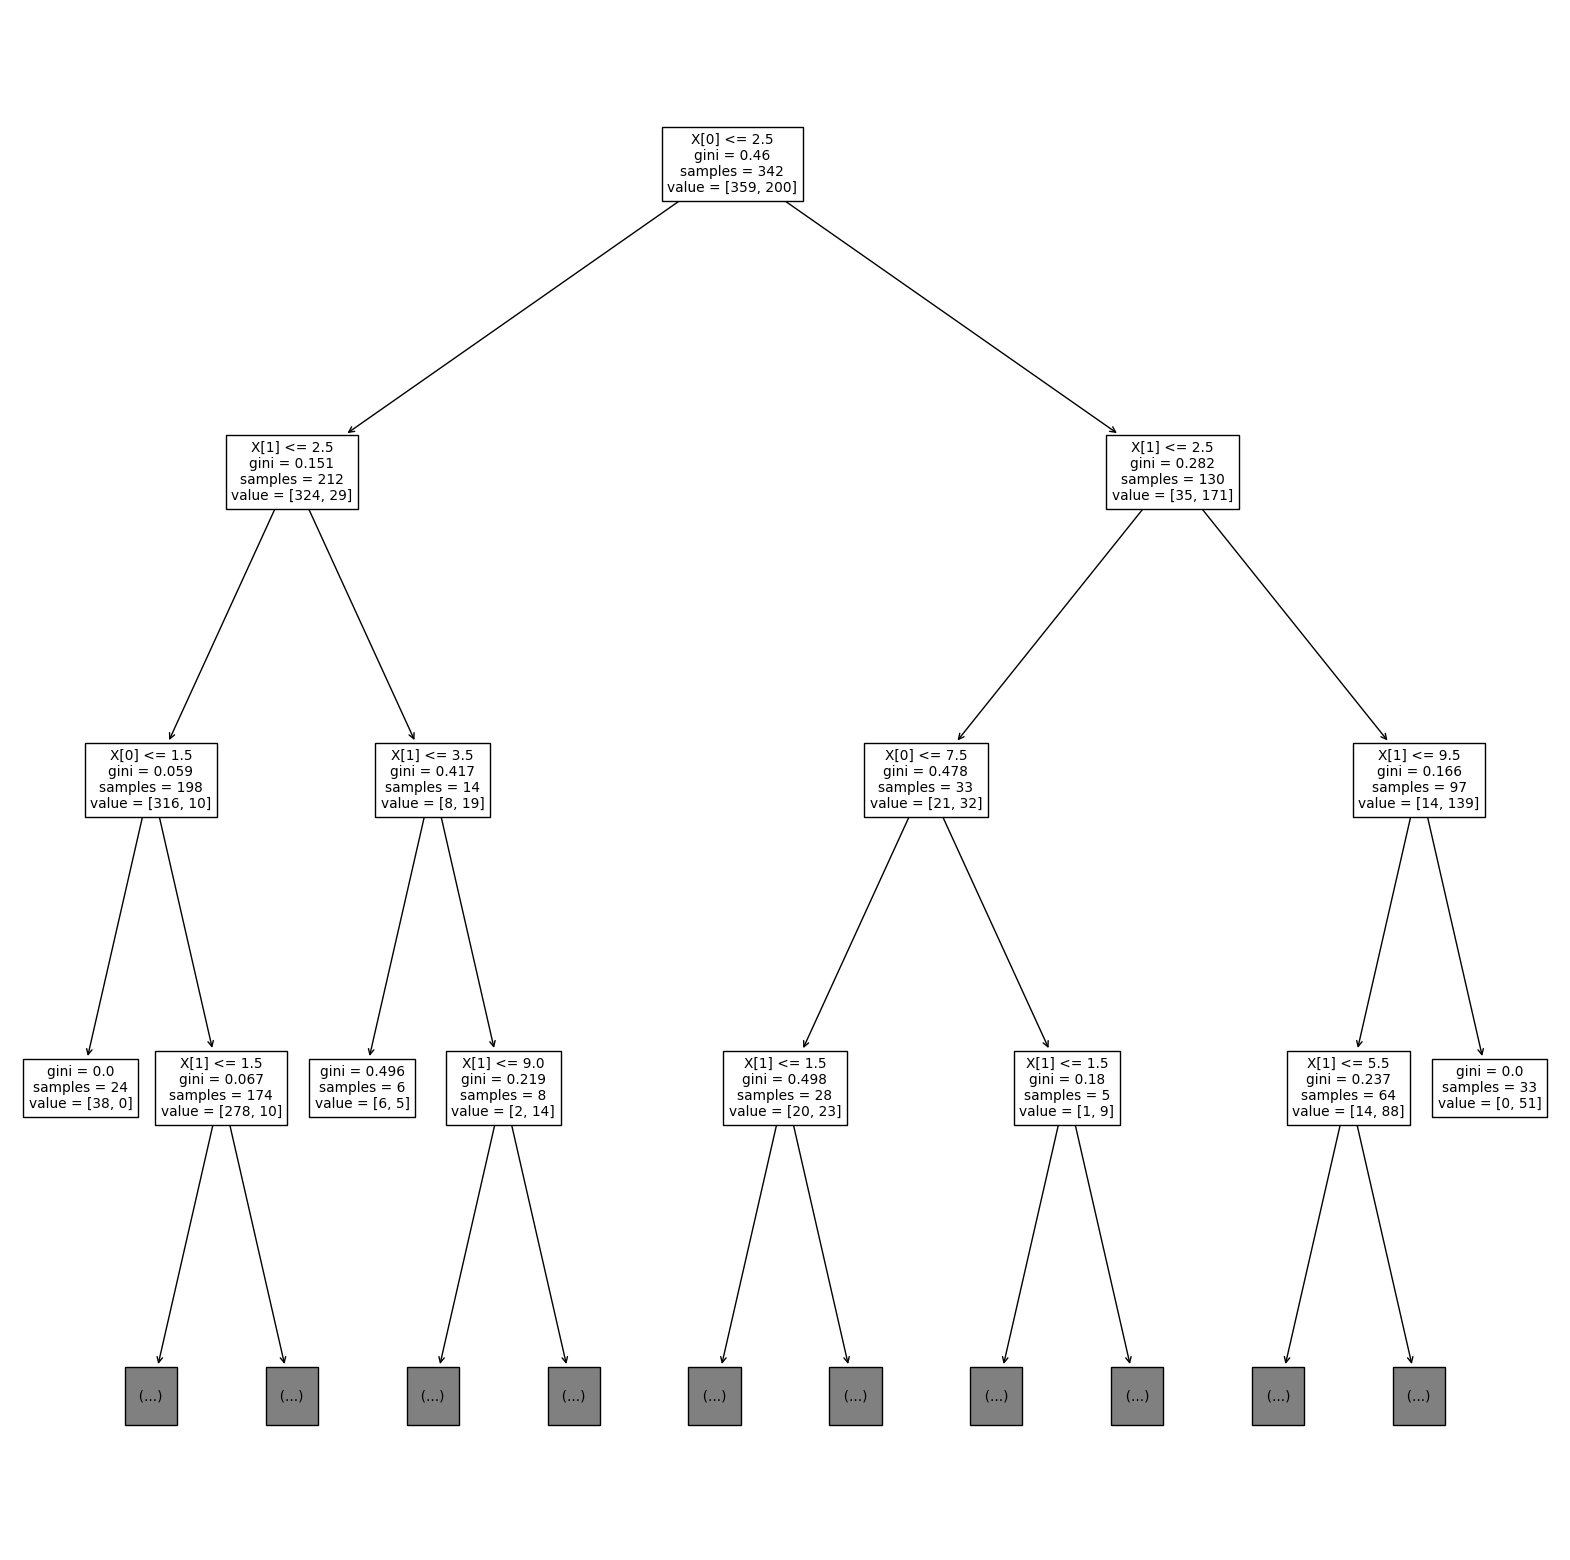

In [48]:
# plot tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(bg_model.estimators_[0],max_depth=3)
plt.show()

In [49]:
rf=RandomForestClassifier(max_features=2)

In [50]:
rf_model=rf.fit(X_train,Y_train)

In [51]:
#0ut of bag OOB

In [52]:
rf1=RandomForestClassifier(oob_score=True)

In [53]:
rf1.fit(X_train,Y_train)

RandomForestClassifier(oob_score=True)

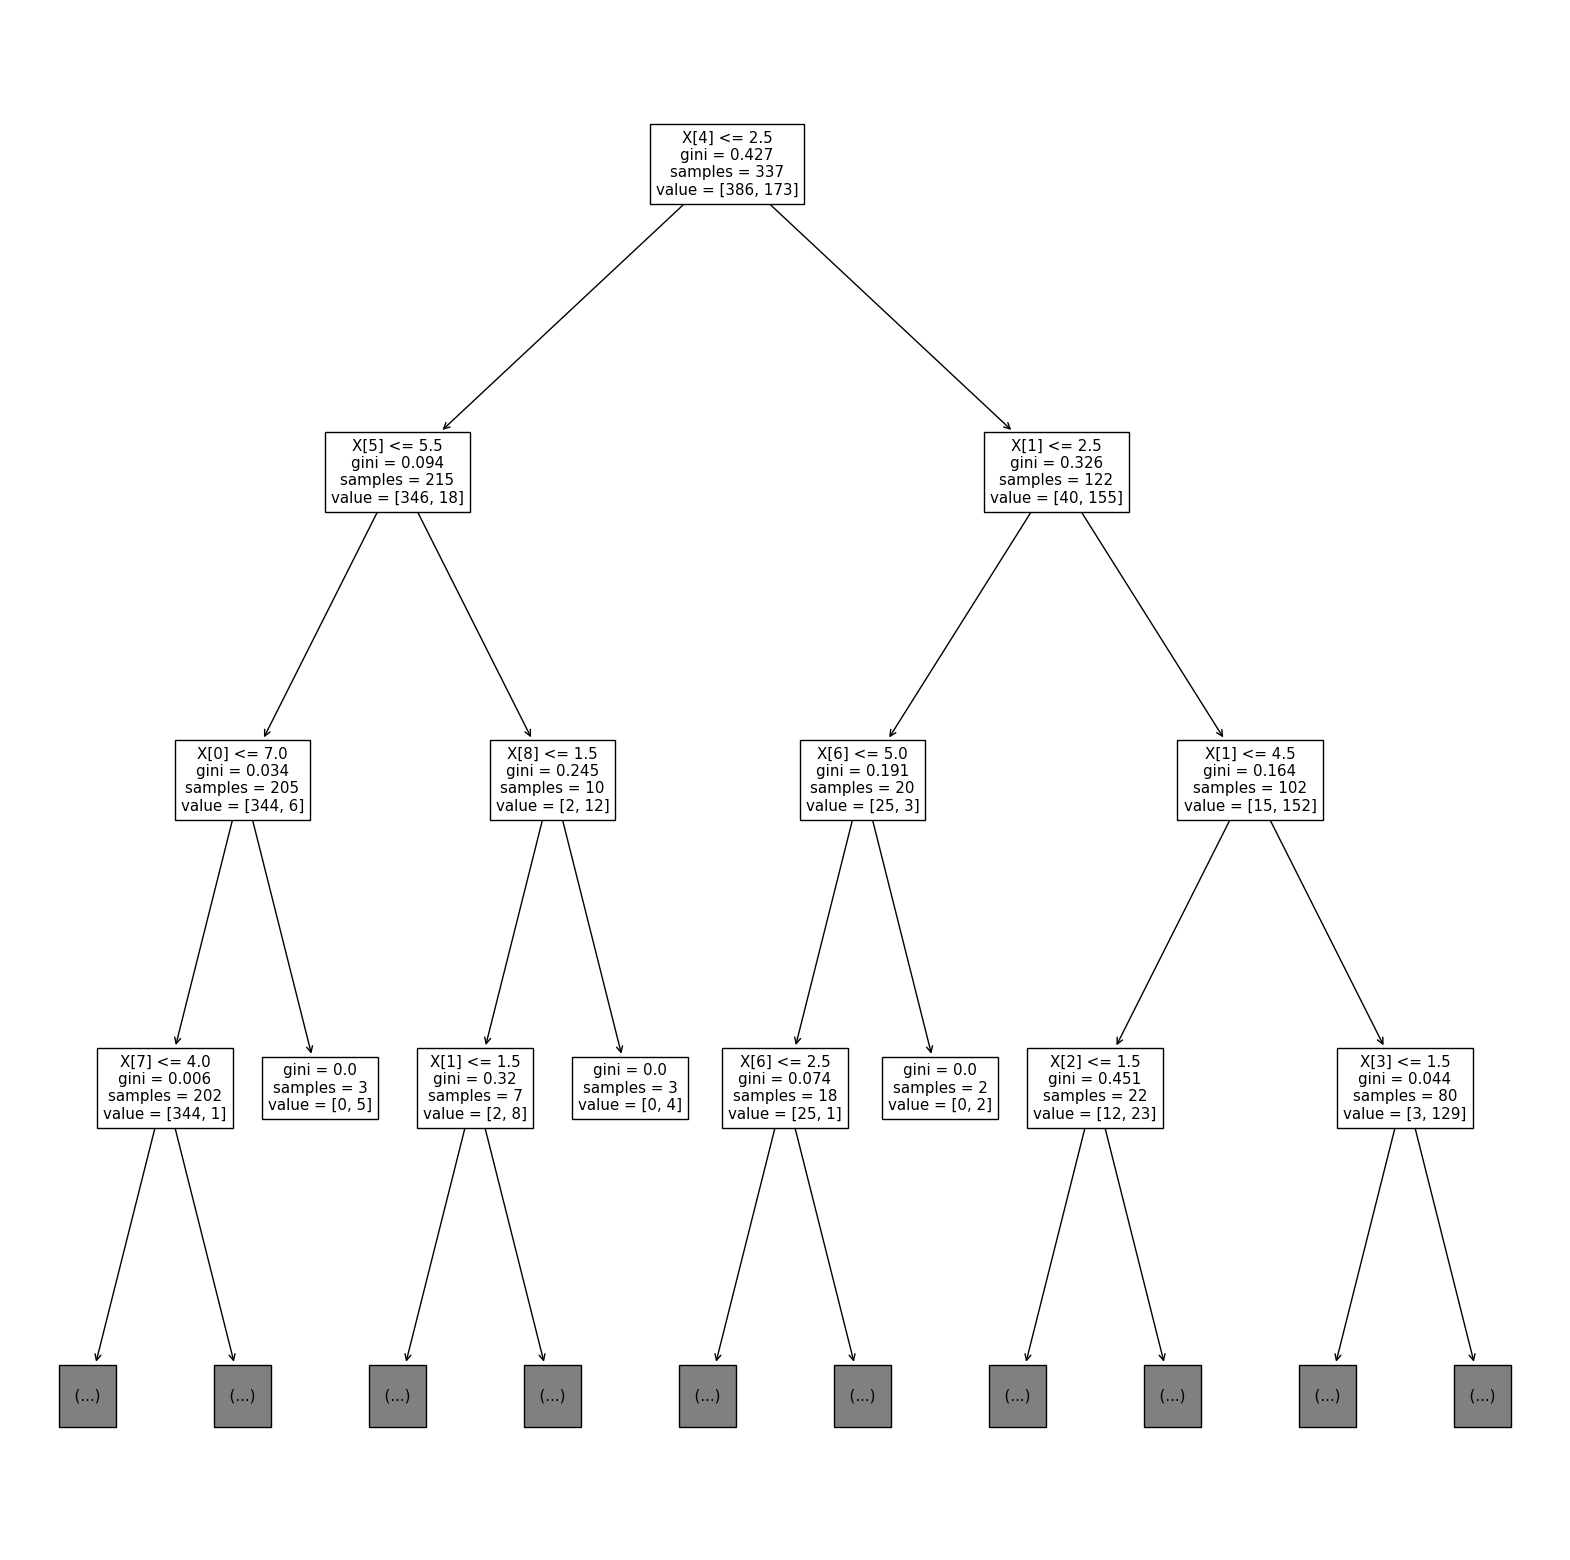

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(rf_model.estimators_[0],max_depth=3)
plt.show()

In [55]:
# out of bag OOB__

In [56]:
rf1=RandomForestClassifier(oob_score=True)

In [57]:
rf1.fit(X_train,Y_train)

RandomForestClassifier(oob_score=True)

In [58]:
oob_error=1-rf1.oob_score_# model evaluation parameter
oob_error

0.028622540250447193

In [59]:
Y_predict_train=rf1.predict(X_train)

In [60]:
confusion_matrix(Y_train,Y_predict_train)

array([[366,   0],
       [  0, 193]])

In [61]:
df["Class"].value_counts()

0    458
1    241
Name: Class, dtype: int64

# boosting approach

In [62]:
#Ensemble technique the weak learners combined to make a strong model like M1,M2,M3...M10
#are weak learners and jointly we are creating a strong model.


In [63]:
#Boosting--Ada boost

In [64]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostClassifier,GradientBoostingRegressor,GradientBoostingClassifier


In [65]:
ad=AdaBoostClassifier()

In [66]:
ad.fit(X_train,Y_train)

AdaBoostClassifier()

In [67]:
Y_pred_ad=ad.predict(X_test)

In [68]:
confusion_matrix(Y_test,Y_pred_ad)

array([[87,  5],
       [ 3, 45]])

In [69]:
print(classification_report(Y_test,Y_pred_ad))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        92
           1       0.90      0.94      0.92        48

    accuracy                           0.94       140
   macro avg       0.93      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



In [70]:
#gradient boosting

In [71]:
gd=GradientBoostingClassifier()

In [72]:
gd.fit(X_train,Y_train)

GradientBoostingClassifier()

In [73]:
Y_pred_gd=gd.predict(X_test)

In [74]:
print(classification_report(Y_test,Y_pred_gd))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        92
           1       0.92      0.98      0.95        48

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



In [75]:
confusion_matrix(Y_test,Y_pred_gd)

array([[88,  4],
       [ 1, 47]])

In [76]:
pip install xgboost # is new version of gradient boosting,more powerful and give better rewult


Note: you may need to restart the kernel to use updated packages.


In [77]:
from xgboost import XGBClassifier,XGBRegressor

In [78]:
xb=XGBClassifier()

In [79]:
xb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [80]:
Y_pred_xb=xb.predict(X_test)

In [81]:
accuracy_score(Y_test,Y_pred_xb)

0.9642857142857143

In [82]:
#pip install catboost

In [83]:
#from catboost import CatBoostClassifier, CatBoostRegressor


In [84]:
#pip install lightgbm

In [85]:
#from lightgm import LGBMClassifier

In [86]:
# Voting Classifier

In [87]:
from sklearn.ensemble import VotingClassifier

In [88]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [89]:
estimators=[("rf",RandomForestClassifier(n_estimators=20)),("svc",SVC()),
           ("knn",KNeighborsClassifier()),
           ("abc",AdaBoostClassifier()),
           ("Lr",LogisticRegression())]

In [90]:
vc=VotingClassifier(estimators)

In [91]:
vc.fit(X_train,Y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=20)),
                             ('svc', SVC()), ('knn', KNeighborsClassifier()),
                             ('abc', AdaBoostClassifier()),
                             ('Lr', LogisticRegression())])

In [92]:
Y_pred=vc.predict(X_test)

In [93]:
accuracy_score(Y_test,Y_pred)

0.9571428571428572

In [94]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        92
           1       0.90      0.98      0.94        48

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



In [95]:
# indifidual performance of all classifier in vc

In [96]:
for est,name in zip(vc.estimators_,vc.estimators):
    print(name[0],est.score(X_test,Y_test))

rf 0.95
svc 0.9571428571428572
knn 0.9571428571428572
abc 0.9428571428571428
Lr 0.9642857142857143


In [97]:
# for my learning purpose

In [98]:
vc.estimators_ 

[RandomForestClassifier(n_estimators=20),
 SVC(),
 KNeighborsClassifier(),
 AdaBoostClassifier(),
 LogisticRegression()]

In [99]:
vc.estimators

[('rf', RandomForestClassifier(n_estimators=20)),
 ('svc', SVC()),
 ('knn', KNeighborsClassifier()),
 ('abc', AdaBoostClassifier()),
 ('Lr', LogisticRegression())]

In [100]:
for est in (vc.estimators_):
    print(est.score(X_test,Y_test))

0.95
0.9571428571428572
0.9571428571428572
0.9428571428571428
0.9642857142857143


In [101]:
for name in (vc.estimators_):
    print(name)

RandomForestClassifier(n_estimators=20)
SVC()
KNeighborsClassifier()
AdaBoostClassifier()
LogisticRegression()


# feature importance--used for dimentionality reduction

In [103]:
# selectKBest chi2 test--approach

In [109]:
from sklearn.feature_selection import SelectKBest

In [110]:
from sklearn.feature_selection import chi2, f_classif,mutual_info_classif

In [111]:
best_features=SelectKBest(score_func=mutual_info_classif,k=9)

In [112]:
X.columns

Index(['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses'],
      dtype='object')

In [113]:
best_features

SelectKBest(k=9, score_func=<function mutual_info_classif at 0x7fde73404ca0>)

In [114]:
best_features.fit(X,Y)

SelectKBest(k=9, score_func=<function mutual_info_classif at 0x7fde73404ca0>)

In [116]:
best_features.scores_

array([0.30317526, 0.46826173, 0.44562985, 0.30222521, 0.34437028,
       0.41317832, 0.35999026, 0.3217126 , 0.1419209 ])

In [117]:
dfscores=pd.DataFrame(best_features.scores_)
dfscores

,0
0,0.303175
1,0.468262
2,0.445630
3,0.302225
4,0.344370
5,0.413178
6,0.359990
7,0.321713
8,0.141921


In [118]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,Cl.thickness
1,Cell.size
2,Cell.shape
3,Marg.adhesion
4,Epith.c.size
5,Bare.nuclei
6,Bl.cromatin
7,Normal.nucleoli
8,Mitoses


In [119]:
featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores

,0,0
0,Cl.thickness,0.303175
1,Cell.size,0.468262
2,Cell.shape,0.445630
3,Marg.adhesion,0.302225
4,Epith.c.size,0.344370
5,Bare.nuclei,0.413178
6,Bl.cromatin,0.359990
7,Normal.nucleoli,0.321713
8,Mitoses,0.141921


In [120]:
featurescores.columns=['Feature_name','Importance']
featurescores

,Feature_name,Importance
0,Cl.thickness,0.303175
1,Cell.size,0.468262
2,Cell.shape,0.445630
3,Marg.adhesion,0.302225
4,Epith.c.size,0.344370
5,Bare.nuclei,0.413178
6,Bl.cromatin,0.359990
7,Normal.nucleoli,0.321713
8,Mitoses,0.141921


In [122]:
featurescores.nlargest(9,'Importance')# descending 

,Feature_name,Importance
1,Cell.size,0.468262
2,Cell.shape,0.445630
5,Bare.nuclei,0.413178
6,Bl.cromatin,0.359990
4,Epith.c.size,0.344370
7,Normal.nucleoli,0.321713
0,Cl.thickness,0.303175
3,Marg.adhesion,0.302225
8,Mitoses,0.141921


In [123]:
# we want to keep only the most imp features to build model

In [124]:
final=featurescores.nlargest(9,'Importance')
final

,Feature_name,Importance
1,Cell.size,0.468262
2,Cell.shape,0.445630
5,Bare.nuclei,0.413178
6,Bl.cromatin,0.359990
4,Epith.c.size,0.344370
7,Normal.nucleoli,0.321713
0,Cl.thickness,0.303175
3,Marg.adhesion,0.302225
8,Mitoses,0.141921


In [125]:
final_X=X[final["Feature_name"]]
final_X

,Cell.size,Cell.shape,Bare.nuclei,Bl.cromatin,Epith.c.size,Normal.nucleoli,Cl.thickness,Marg.adhesion,Mitoses
0,1,1,1.0,3,2,1,5,1,1
1,4,4,10.0,3,7,2,5,5,1
2,1,1,2.0,3,2,1,3,1,1
3,8,8,4.0,3,3,7,6,1,1
4,1,1,1.0,3,2,1,4,3,1
...,...,...,...,...,...,...,...,...,...
694,1,1,2.0,1,3,1,3,1,1
695,1,1,1.0,1,2,1,2,1,1
696,10,10,3.0,8,7,10,5,3,2
697,8,6,4.0,10,3,6,4,4,1


In [ ]:
# assignment build the model keeping only 7 features and see the performance


In [ ]:
# another approach---'feature_importances_'

In [ ]:
# we can use the function---feature_importances_ on almost all the algorithms
# df,RF,bugging
# lets try on random forest

In [124]:
rf.fit(X_train,Y_train)

RandomForestClassifier(max_features=2)

In [125]:
imporatnce=rf.feature_importances_

In [126]:
imporatnce

array([0.08322853, 0.16072977, 0.21711752, 0.04057037, 0.07785695,
       0.15673548, 0.16831332, 0.08618574, 0.00926232])

In [130]:
RF_imp_feature=pd.DataFrame(rf.feature_importances_,columns=['Feature importance'],index=X.columns)

In [133]:
RF_imp_feature.sort_values(by='Feature importance',ascending=False)

,Feature importance
Cell.shape,0.217118
Bl.cromatin,0.168313
Cell.size,0.160730
Bare.nuclei,0.156735
Normal.nucleoli,0.086186
Cl.thickness,0.083229
Epith.c.size,0.077857
Marg.adhesion,0.040570
Mitoses,0.009262
